In [2]:
from __future__ import absolute_import

import sys
if '../' not in sys.path:
  sys.path.append('../')

import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

%matplotlib inline

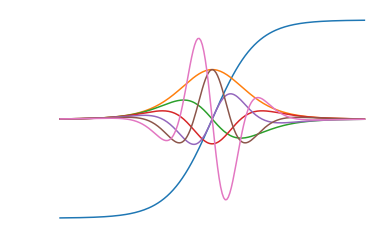

In [3]:
# We could use np.tanh, but let's write our own as an example.

def tanh(x):
    return (1.0 - np.exp(-x))  / (1.0 + np.exp(-x))

x = np.linspace(-7, 7, 200)
plt.plot(x, tanh(x),
         x, grad(tanh)(x),                                # first  derivative
         x, grad(grad(tanh))(x),                          # second derivative
         x, grad(grad(grad(tanh)))(x),                    # third  derivative
         x, grad(grad(grad(grad(tanh))))(x),              # fourth derivative
         x, grad(grad(grad(grad(grad(tanh)))))(x),        # fifth  derivative
         x, grad(grad(grad(grad(grad(grad(tanh))))))(x))  # sixth  derivative

plt.axis('off')
plt.savefig("tanh.png")
plt.show()

In [4]:
# How does Autograd deal with broadcasting?

from autograd.numpy.numpy_vjps import unbroadcast

x = 2.0

# Let f(x) = x + [1, 1, 1].
#
# If x[], then it is numpy first prepends as many length-1 dims as necessary (in this case, 1) to get
# x[1], then copies along those length-1 dims to match [1, 1, 1] (in this case, 3x).
#
# We can look at f(x) as f(x_1=x, x_2=x, x_3=x). Then the total derivative of f() wrt x is,
# df/dx = \sum_{i} (df/dx_i) (dx_i/dx)
#       = \sum_{i} 1 * 1
#       = 3 = number of times x was copied.

def f(x):
    return x + np.ones((3,))

x = 2.0
y = f(x)
g = np.ones(np.shape(y))
print unbroadcast(x, g)

# Any time numpy needs to broadcast, it clones the broadcasted value along leading dimensions.
# During backpropagation, we sum over these dimensions as total derivative requires.
print ''

x = np.arange(2).reshape((2, 1))
y = f(x)
g = np.ones(np.shape(y))
print unbroadcast(x, g)

3.0

[[3.]
 [3.]]


In [5]:
# What does Autograd do when a function has non-differentiable functions?
#
# It assumes their derivative is zero wrt their inputs.

def foo(x):
    return np.floor(x) + x

grad(foo)(1.5)

array(1.)